In [50]:
# Import dependencies
from ipynb.fs.full.emissions_analysis import main_df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import linregress
from scipy.stats import ttest_ind as scipyt

In [2]:
continents_data = 'continents.csv'
continents = pd.read_csv(continents_data)
continents_clean = pd.DataFrame({'Country': continents['name'], 'Region': continents['region'], 'Sub-Region': continents['sub-region']})


In [90]:
# Linear Regression for Regional Rice Yields vs Methane Emissions. 
def lin_reg(x,y):
    x_values = x
    y_values = y
    # if x_values.mean() < 0:
    #     plotx = -30
    # else:
    #     plotx = 10
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,color='k')
    # plt.legend(line_eq, loc='best')
    # plt.annotate(line_eq,(plotx,15),fontsize=15,color="red")
    print(line_eq)
    print(f"The r-value is {rvalue}")

# T-Test looks to fit better, since we are using two different datasets. 
def ttest(x1,x2):
    ttest_val = scipyt(x1, x2)
    if ttest_val[1] < 0.05:
        print(ttest_val)
        print('Null Hypothesis rejected. Samples are related.')


In [63]:
merged_df = pd.merge(main_df, continents_clean, how='left')

In [5]:
# Isolating relevant datapoints for analysis
# yield_df = main_df[['Country', 'Year', 'Rice Cultivation', 'Forestland', 'rice_yield']]
yield_df = pd.DataFrame({'Country':merged_df['Country'],'Region': merged_df['Region'], 'Sub-Region': merged_df['Sub-Region'],'Year': merged_df['Year'],
                                   "Methane": merged_df['Rice Cultivation'],
                                   "CO2 Released from Forestland": merged_df['Forestland'],
                                   "Rice Yield": merged_df['rice_yield']})

# Further cleaning and data-wrangling/formatting
cleaned_yields = yield_df.dropna()
cleaned_yields.reset_index(drop=True)
cleaned_yields.set_index('Country')


,Region,Sub-Region,Year,Methane,CO2 Released from Forestland,Rice Yield
Country,,,,,,
Afghanistan,Asia,Southern Asia,1990,686.0000,-2388.8030,1.9029
Afghanistan,Asia,Southern Asia,1991,678.1600,-2388.8030,1.9364
Afghanistan,Asia,Southern Asia,1992,686.0000,-2388.8030,1.7143
Afghanistan,Asia,Southern Asia,1993,686.0000,-2388.8030,1.7143
Afghanistan,Asia,Southern Asia,1994,705.6000,-2388.8030,1.9000
...,...,...,...,...,...,...
Zimbabwe,Africa,Sub-Saharan Africa,2016,7.4088,76500.2982,0.3428
Zimbabwe,Africa,Sub-Saharan Africa,2017,7.9458,76500.2982,0.3745
Zimbabwe,Africa,Sub-Saharan Africa,2018,8.1399,76500.2982,0.3983


In [7]:
regions = cleaned_yields['Region'].unique()
sub_regions = cleaned_yields['Sub-Region'].unique()
print(regions)
print(sub_regions)

['Asia' 'Europe' 'Africa' 'Americas' 'Oceania']
['Southern Asia' 'Southern Europe' 'Northern Africa' 'Sub-Saharan Africa'
 'Latin America and the Caribbean' 'Australia and New Zealand'
 'Western Asia' 'Eastern Europe' 'South-eastern Asia' 'Eastern Asia'
 'Melanesia' 'Western Europe' 'Central Asia']


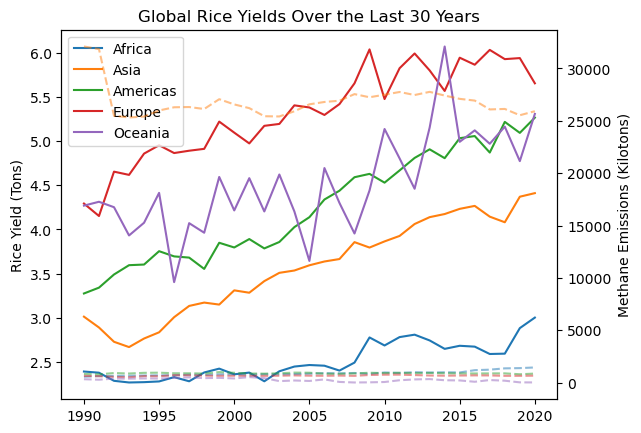

Ttest_indResult(statistic=-72.52393171763316, pvalue=3.813386338548889e-60)
Null Hypothesis rejected. Samples are related.


In [56]:
# Separate out regions for plotting
africa = cleaned_yields.loc[cleaned_yields['Region'] == 'Africa', ['Year','Rice Yield']]
africa_yields = africa.groupby('Year')['Rice Yield'].mean()
africa_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Africa', ['Year','Methane']]
africa_ch4_yields = africa_ch4.groupby('Year')['Methane'].mean()

americas = cleaned_yields.loc[cleaned_yields['Region'] == 'Americas', ['Year','Rice Yield']]
amer_yields = americas.groupby('Year')['Rice Yield'].mean()
americas_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Americas', ['Year','Methane']]
amer_ch4_yields = americas_ch4.groupby('Year')['Methane'].mean()

asia = cleaned_yields.loc[cleaned_yields['Region'] == 'Asia', ['Year','Rice Yield']]
asian_yields = asia.groupby('Year')['Rice Yield'].mean()
asia_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Asia', ['Year','Methane']]
asian_ch4_yields = asia_ch4.groupby('Year')['Methane'].mean()

europe = cleaned_yields.loc[cleaned_yields['Region'] == 'Europe', ['Year','Rice Yield']]
euro_yields = europe.groupby('Year')['Rice Yield'].mean()
europe_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Europe', ['Year','Methane']]
euro_ch4_yields = europe_ch4.groupby('Year')['Methane'].mean()

ocean = cleaned_yields.loc[cleaned_yields['Region'] == 'Oceania', ['Year','Rice Yield']]
ocean_yields = ocean.groupby('Year')['Rice Yield'].mean()
ocean_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Oceania', ['Year','Methane']]
ocean_ch4_yields = ocean_ch4.groupby('Year')['Methane'].mean()

fig1, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(africa_yields, label='Africa'), ax1.plot(asian_yields, label='Asia'), ax1.plot(amer_yields, label='Americas'), \
ax1.plot(euro_yields, label='Europe'), ax1.plot(ocean_yields, label='Oceania'), \
ax2.plot(africa_ch4_yields, label='Africa CH4', alpha=.5, linestyle='dashed'), \
ax2.plot(asian_ch4_yields, label='Asia CH4', alpha=.5, linestyle='dashed'), \
ax2.plot(amer_ch4_yields, label='Americas CH4', alpha=.5,linestyle='dashed'), \
ax2.plot(euro_ch4_yields, label='European CH4', alpha=.5, linestyle='dashed'), \
ax2.plot(ocean_ch4_yields, label='Oceania CH4', alpha=.5, linestyle='dashed')
ax1.legend()
ax1.set_ylabel('Rice Yield (Tons)')
ax2.set_ylabel('Methane Emissions (Kilotons)')
plt.title('Global Rice Yields Over the Last 30 Years')
plt.show()
ttest(euro_yields, euro_ch4_yields)

y = 55.65x + 366.53
The r-value is 0.5768494696809449


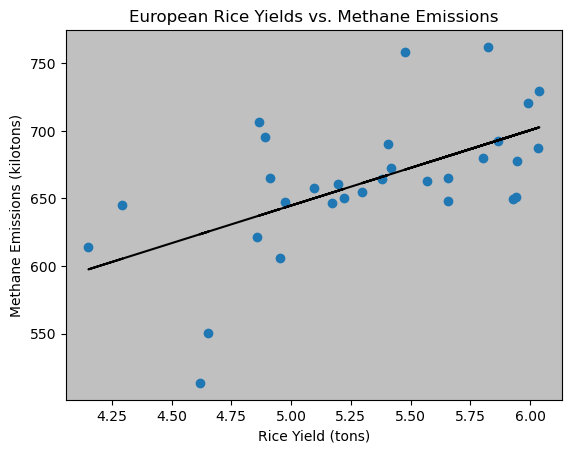

In [112]:
scatterx = euro_yields
scattery = euro_ch4_yields
scatterfig, scatterax = plt.subplots()
scatterax.set_facecolor('silver')
lin_reg(scatterx,scattery)
plt.title('European Rice Yields vs. Methane Emissions')
plt.ylabel('Methane Emissions (kilotons)')
plt.xlabel('Rice Yield (tons)')
plt.scatter(scatterx, scattery)
plt.show()


y = -128.83x + 27306.38
The r-value is -0.04426136297378298


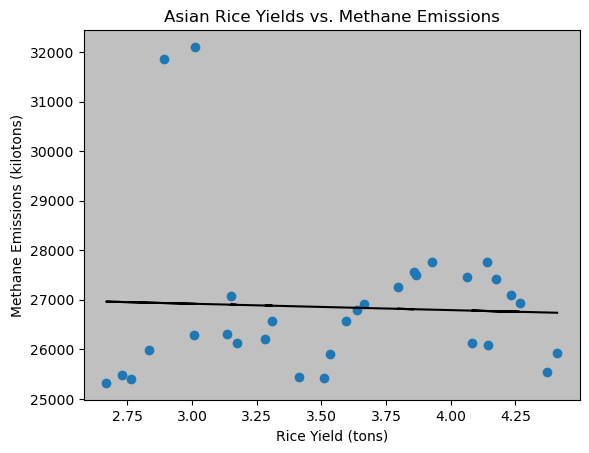

In [94]:
scatterx2 = asian_yields
scattery2 = asian_ch4_yields
scatterax2 = plt.axes()
scatterax2.set_facecolor('silver')
plt.ylabel('Methane Emissions (kilotons)')
plt.xlabel('Rice Yield (tons)')
lin_reg(scatterx2,scattery2)
plt.title('Asian Rice Yields vs. Methane Emissions')
plt.scatter(scatterx2,scattery2)

plt.show()


## Methane emissions seem to have a weak link to rice yields.
--- 
Over the last thirty years, methane emissions have remained relatively stable, while rice yields have climbed steadily. 

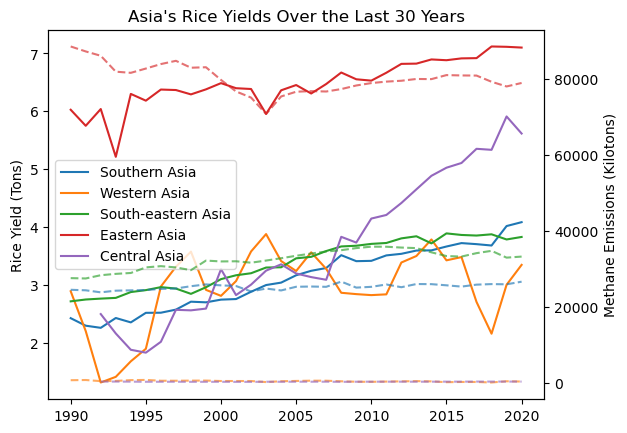

Ttest_indResult(statistic=-118.15143516937573, pvalue=9.000669014789948e-73)
Null Hypothesis rejected. Samples are related.
Ttest_indResult(statistic=-12.215570885741487, pvalue=6.428356938325344e-18)
Null Hypothesis rejected. Samples are related.


In [54]:
south_asia = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Southern Asia', ['Year','Rice Yield']]
south_asia_yields = south_asia.groupby('Year')['Rice Yield'].mean()
south_asia_ch4 = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Southern Asia', ['Year','Methane']]
south_asia_ch4_yields = south_asia_ch4.groupby('Year')['Methane'].mean()

west_asia = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Western Asia', ['Year','Rice Yield']]
west_asia_yields = west_asia.groupby('Year')['Rice Yield'].mean()
west_asia_ch4 = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Western Asia', ['Year','Methane']]
west_asia_ch4_yields = west_asia_ch4.groupby('Year')['Methane'].mean()

se_asia = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'South-eastern Asia', ['Year','Rice Yield']]
se_asia_yields = se_asia.groupby('Year')['Rice Yield'].mean()
se_asia_ch4 = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'South-eastern Asia', ['Year','Methane']]
se_asia_ch4_yields = se_asia_ch4.groupby('Year')['Methane'].mean()

east_asia = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Eastern Asia', ['Year','Rice Yield']]
east_asia_yields = east_asia.groupby('Year')['Rice Yield'].mean()
east_asia_ch4 = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Eastern Asia', ['Year','Methane']]
east_asia_ch4_yields = east_asia_ch4.groupby('Year')['Methane'].mean()

cent_asia = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Central Asia', ['Year','Rice Yield']]
cent_asia_yields = cent_asia.groupby('Year')['Rice Yield'].mean()
cent_asia_ch4 = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Central Asia', ['Year','Methane']]
cent_asia_ch4_yields = cent_asia_ch4.groupby('Year')['Methane'].mean()

fig2, ax3 = plt.subplots()
ax4 = ax3.twinx()


ax3.plot(south_asia_yields, label='Southern Asia'), ax3.plot(west_asia_yields, label='Western Asia'), \
ax3.plot(se_asia_yields, label='South-eastern Asia'), ax3.plot(east_asia_yields, label='Eastern Asia'), \
ax3.plot(cent_asia_yields, label='Central Asia'), ax4.plot(south_asia_ch4_yields, alpha=.65, linestyle='dashed'), \
ax4.plot(west_asia_ch4_yields, alpha=.65, linestyle='dashed'), ax4.plot(se_asia_ch4_yields, alpha=.65, linestyle='dashed'), \
ax4.plot(east_asia_ch4_yields, alpha=.65, linestyle='dashed'), ax4.plot(cent_asia_ch4_yields, alpha=.65, linestyle='dashed')

ax3.legend(loc='best')

ax3.set_ylabel('Rice Yield (Tons)')
ax4.set_ylabel('Methane Emissions (Kilotons)')
plt.title("Asia's Rice Yields Over the Last 30 Years")
plt.show()
ttest(east_asia_yields, east_asia_ch4_yields)
ttest(west_asia_yields, west_asia_ch4_yields)

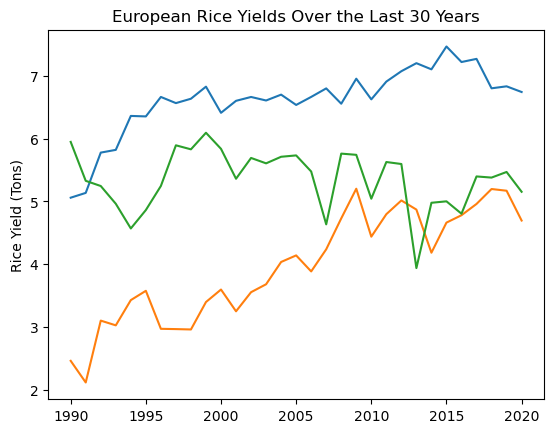

In [17]:
# Separate out sub-regions for plotting
south_euro = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Southern Europe', ['Year','Rice Yield']]
south_euro_yields = south_euro.groupby('Year')['Rice Yield'].mean()

east_euro = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Eastern Europe', ['Year','Rice Yield']]
east_euro_yields = east_euro.groupby('Year')['Rice Yield'].mean()

west_euro = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Western Europe', ['Year','Rice Yield']]
west_euro_yields = west_euro.groupby('Year')['Rice Yield'].mean()



plt.plot(south_euro_yields, label='Southern Europe'), plt.plot(east_euro_yields, label='Eastern Europe'), \
    plt.plot(west_euro_yields, label='Western Europe')

ax3.legend()
# plt.xlabel('Year')
plt.ylabel('Rice Yield (Tons)')
plt.title('European Rice Yields Over the Last 30 Years')
plt.show()

In [12]:
# Separate out regions for plotting
africa_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Africa', ['Year','Methane']]
africa_ch4_yields = africa_ch4.groupby('Year')['Methane'].mean()

americas_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Americas', ['Year','Methane']]
amer_ch4_yields = americas_ch4.groupby('Year')['Methane'].mean()

asia_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Asia', ['Year','Methane']]
asian_ch4_yields = asia_ch4.groupby('Year')['Methane'].mean()

europe_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Europe', ['Year','Methane']]
euro_ch4_yields = europe_ch4.groupby('Year')['Methane'].mean()

ocean_ch4 = cleaned_yields.loc[cleaned_yields['Region'] == 'Oceania', ['Year','Methane']]
ocean_ch4_yields = ocean_ch4.groupby('Year')['Methane'].mean()

fig4, ax4 = plt.subplots()

fig4 = 
ax4.legend()
# plt.xlabel('Year')
plt.ylabel('Methane Emissions (Kilotons)')
plt.title('Methane Emissions Over the Last 30 Years')
plt.show()

SyntaxError: invalid syntax (4080149587.py, line 19)

# Cause for Methane Production in Rice Cultivation:
---
Rice paddies or fields are flooded for a large portion of the year to reduce the need for pesticides to treat the plants, and the flooding of the soil produces large amounts of methane (10% of global methane emissions)


In [ ]:
north_africa = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Northern Africa', ['Year','Rice Yield']]
north_africa_yields = north_africa.groupby('Year')['Rice Yield'].mean()

sub_africa = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Sub-Saharan Africa', ['Year','Rice Yield']]
sub_africa_yields = sub_africa.groupby('Year')['Rice Yield'].mean()

latin_carib = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Latin America and the Caribbean', ['Year','Rice Yield']]
latin_carib_yields = latin_carib.groupby('Year')['Rice Yield'].mean()

aus_nz = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Australia and New Zealand', ['Year','Rice Yield']]
aus_nz_yields = aus_nz.groupby('Year')['Rice Yield'].mean()

melanesia = cleaned_yields.loc[cleaned_yields['Sub-Region'] == 'Melanesia', ['Year','Rice Yield']]
melanesia_yields = melanesia.groupby('Year')['Rice Yield'].mean()
